# Matplotlib & Seaborn

## Overview

- matplotlib is a python 2D plotting library built on the top of the basic Python language and Numpy.
- More about matplotlib can be found in its [documentation](http://matplotlib.org/contents.html).
- Seaborn is a Python visualization library based on matplotlib. 
- It provides a high-level interface for drawing - attractive statistical graphics. Here is the [documentation](http://seaborn.pydata.org/index.html).
- If you want a live demo of your jupyter notebook, try this [nbviewer](http://nbviewer.jupyter.org/) website.
- Plotly is an interactive, browser-based graphing library. Any chart that you could make in matplotlib, you can make interactive with Plotly. 
- To install the packages, cd to the lecture code directory and run the following command `pip install plotly==2.2.3`
- You need to restart the kernel in order to make it work.

- To display the graph inside IPython notebook, we need to run the following line of code.

In [ ]:
#!pip install plotly==2.2.3

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

- For today's lecture, we will use the IMDB dataset scraped by Sun Chuan, who is one of our graduates from Bootcamp 6.

- He also uploaded the dataset to Kaggle so you can check it out [here](https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset). Let's load the data first.

In [3]:
df = pd.read_csv('https://s3.amazonaws.com/nycdsabt01/movie_metadata.csv')

Let's brush up our pandas knowledge first.
- The `head()` method will return the first 5 rows in your dataframe.
- You can specify the number of rows you want to return as the input argument.

In [4]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


- You might see those `...` since there are too many columns there. We want to get the whole idea how does the dataset look like. 
- You can save all the columns to a Python list. It is a little bit better.

In [5]:
df.columns.tolist()

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

- We can also tell pandas to display a larger number of columns without truncating them.

In [6]:
pd.set_option('display.max_columns', 50)

In [7]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


- The `shape` attribute will return the dimensions of your dataframe.

In [8]:
df.shape

(5043, 28)

- The `describe()` method will return the statistics of numeric columns (exclude missing value).

In [9]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


- To get the statistics of a category column, we might call the `value_counts()` method.

In [10]:
df['language'].value_counts()

English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Italian         11
Cantonese       11
Russian         11
Korean           8
Portuguese       8
Danish           5
Arabic           5
Hebrew           5
Swedish          5
Dutch            4
Persian          4
Polish           4
Norwegian        4
Chinese          3
Thai             3
Icelandic        2
Romanian         2
Dari             2
Aboriginal       2
None             2
Zulu             2
Indonesian       2
Telugu           1
Maya             1
Urdu             1
Hungarian        1
Bosnian          1
Filipino         1
Panjabi          1
Mongolian        1
Kannada          1
Aramaic          1
Vietnamese       1
Greek            1
Czech            1
Kazakh           1
Dzongkha         1
Slovenian        1
Tamil            1
Swahili          1
Name: language, dtype: int64

### Exercise 1

- Create a subset of our original dataframe that only contains films whose language is either English, French or Mandarin.
- At the same time, only return the films that have `imdb_score > 7`
- A pandas series object has a method called `isin` that might come in handy.

In [11]:
# Your code here.
langs = ["English" ,"French", "Mandarin"]

In [12]:
mask = df['language'].isin(langs)

In [13]:
mask2 = df['imdb_score']>7

In [14]:
df[mask & mask2]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,Color,Neil LaBute,80.0,97.0,119.0,7.0,Matt Malloy,136.0,2856622.0,Comedy|Drama,Stacy Edwards,In the Company of Men,11550,254,Jason Dixie,0.0,business trip|love|misogynist|office|secretary,http://www.imdb.com/title/tt0119361/?ref_=fn_t...,197.0,English,Canada,R,25000.0,1997.0,108.0,7.3,1.85,489
5015,Black and White,Richard Linklater,61.0,100.0,0.0,0.0,Richard Linklater,5.0,1227508.0,Comedy|Drama,Tommy Pallotta,Slacker,15103,5,Jean Caffeine,0.0,austin texas|moon|pap smear|texas|twenty somet...,http://www.imdb.com/title/tt0102943/?ref_=fn_t...,80.0,English,USA,R,23000.0,1991.0,0.0,7.1,1.37,2000
5036,Color,Anthony Vallone,NaN,84.0,2.0,2.0,John Considine,45.0,NaN,Crime|Drama,Richard Jewell,The Mongol King,36,93,Sara Stepnicka,0.0,jewell|mongol|nostradamus|stepnicka|vallone,http://www.imdb.com/title/tt0430371/?ref_=fn_t...,1.0,English,USA,PG-13,3250.0,2005.0,44.0,7.8,NaN,4
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84


# Histogram

- To plot a histogram, we need to call the `hist()` function in matplotlib.
- The input should be a **numeric** column of the dataframe.

- Explore some of the available parameters when you move your cursor inside the function parentheses and press **shift+tab**
- For example, we can change the color and the number of bins. For color, you can simply type `"blue"` or `"b"` for short. At the same time, it accepts hex color code, which you can pick a color from this [website](http://www.color-hex.com/) and paste the hexadecimal code.

(array([  5.,  11.,  12.,  26.,  51.,  51.,  95., 127., 217., 362., 497.,
        661., 795., 720., 666., 419., 226.,  81.,  18.,   3.]),
 array([1.6  , 1.995, 2.39 , 2.785, 3.18 , 3.575, 3.97 , 4.365, 4.76 ,
        5.155, 5.55 , 5.945, 6.34 , 6.735, 7.13 , 7.525, 7.92 , 8.315,
        8.71 , 9.105, 9.5  ]),
 <a list of 20 Patch objects>)

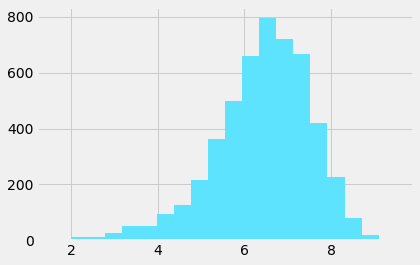

In [15]:
plt.hist(df['imdb_score'], bins=20, color="#5ee3ff")

### Exercise 2

- Create a histogram of the budget column. Did you encounter any error? See whether you can fix it by following this [Stack Overflow Link](http://stackoverflow.com/q/20656663)

- How does the graph look? Is there anyway to improve this? What does x-axis stand for? 
- All the code in the same cell will contribute to the same plot. Similiar to adding different layers in ggplot2
- Type `plt.` and press tab to see if you can get any hint.

In [16]:
np.sum(df['budget'].isna())

492

Text(0.5, 1.0, 'Histogram of budget')

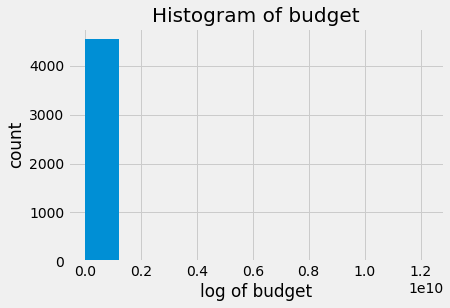

In [17]:
#### Your code here
plt.hist(df['budget'].dropna())
plt.xlabel('log of budget')
plt.ylabel('count')
plt.title('Histogram of budget', fontsize=20)

- Pandas dataframe also provides plotting function. It is calling the matplotlib library behind the scenes.
- You can check all the available plots from the documenation [here](https://pandas.pydata.org/pandas-docs/stable/visualization.html)
- To make the plot looks nicer, we can import the seaborn package here.

Text(0.5, 1.0, 'Histogram of budget')

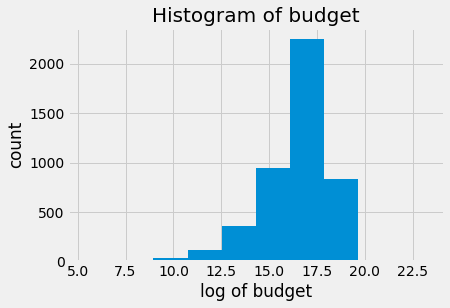

In [18]:
#import seaborn as sns
log_budget = np.log(df['budget'])
log_budget.plot.hist()
plt.xlabel('log of budget')
plt.ylabel('count')
plt.title('Histogram of budget', fontsize=20)

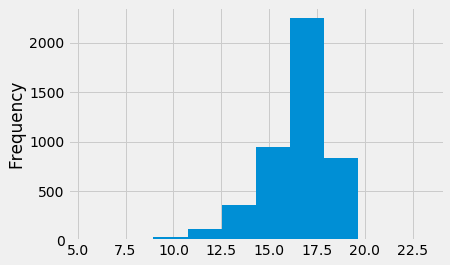

In [19]:
log_budget.plot(kind='hist')

# Scatterplot
- Scatterplots are useful for bivariate analysis. We can check the relationship between two columns.
- Suppose we want to figure out whether there is a relationship between the gross income and the budget.

Text(0, 0.5, 'Gross Income')

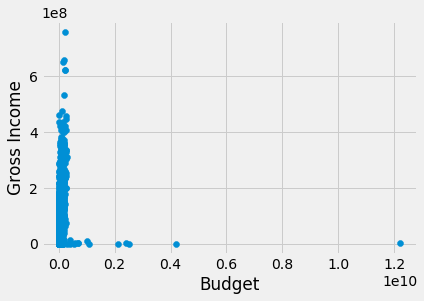

In [20]:
plt.scatter(df['budget'], df['gross'])
plt.xlabel('Budget')
plt.ylabel('Gross Income')

- Here is a way to plot it using the plotting function from pandas.

Text(0, 0.5, 'Gross Income')

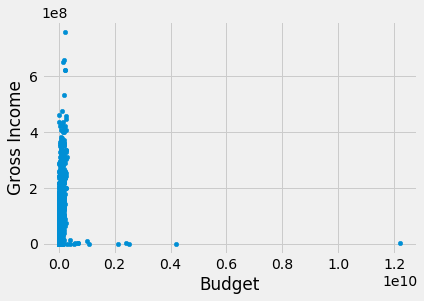

In [21]:
#df.plot.scatter(x='budget', y='gross')
df.plot(kind='scatter',x='budget', y='gross')
plt.xlabel('Budget')
plt.ylabel('Gross Income')

- We can see here there are some outliers there so it makes the graph less useful. 
- Let's try to remove them from our dataframe using the apply function.

In [22]:
scatter_df = df[['gross', 'budget']]
scatter_df = scatter_df.loc[scatter_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

In [23]:
scatter_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)

2       False
5       False
7       False
11      False
12      False
        ...  
5033     True
5034     True
5035     True
5037     True
5042     True
Length: 3786, dtype: bool

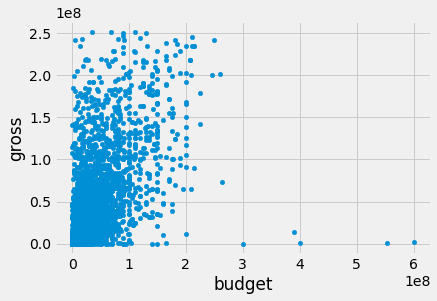

In [24]:
scatter_df.plot.scatter(x='budget', y='gross')

- Sometimes it is interesting to take a look at those outliers. 
- In the previous example, we remove the outlier, we can simply use the **~** symbol for the other way around. 
- We can merge the outlier dataframe with the original one to get other features and sort by the amount of budget in a descending order.

In [25]:
outliers = df[['gross', 'budget']].dropna()
outliers = outliers.loc[~outliers.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]


In [26]:
outliers.shape

(93, 2)

In [27]:
outliers.merge(df, how='left', left_index=True, right_index=True, suffixes=['', '_y'])[['gross', 'budget', 'movie_title']].\
sort_values(by='budget', ascending=False)

,gross,budget,movie_title
2988,2201412.0,1.221550e+10,The Host
3859,211667.0,4.200000e+09,Lady Vengeance
3005,195888.0,2.500000e+09,Fateless
2323,2298191.0,2.400000e+09,Princess Mononoke
2334,410388.0,2.127520e+09,Steamboy
...,...,...,...
1536,309125409.0,3.250000e+07,Star Wars: Episode VI - Return of the Jedi
2051,290158751.0,1.800000e+07,Star Wars: Episode V - The Empire Strikes Back
2601,285761243.0,1.800000e+07,Home Alone
3024,460935665.0,1.100000e+07,Star Wars: Episode IV - A New Hope


- Next, let's check out whether there is a relationship between imdb_score and gross income. 

In [28]:
score_df = df[['gross', 'imdb_score']]

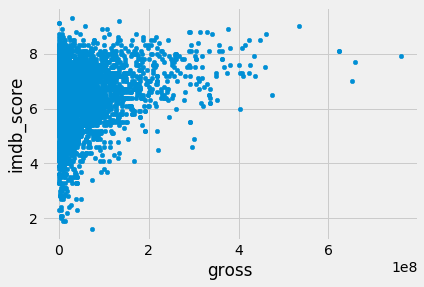

In [29]:
score_df.plot.scatter('gross', 'imdb_score')

### Exercise 3
- How is gross income related to director Facebook likes? 
- How is the imdb_score related to num_critic_for_reviews?

In [30]:
#### Your code here
print(df.columns)
gross_df = df[['director_facebook_likes', 'gross']]
critic_df = df[['num_critic_for_reviews', 'imdb_score']]

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


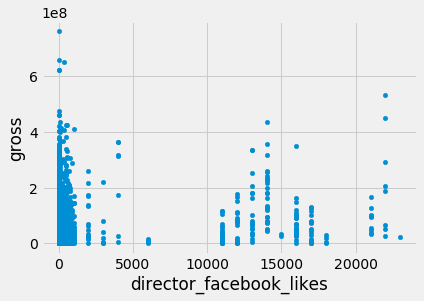

In [31]:
gross_df.plot.scatter(*['director_facebook_likes', 'gross'])    

# Barplot

- Barplot is often used to visualize the amount of each class in a categorical feature. It shows the difference between factors.
- i.e which country has the highest median imdb score

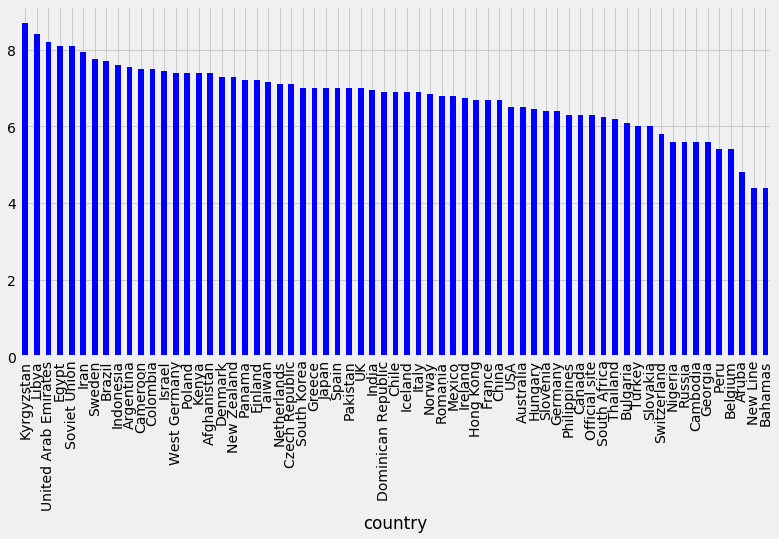

In [35]:
plt.figure(figsize=(12,6))
df.groupby('country')['imdb_score'].median().sort_values(ascending=False).plot.bar(color='b')

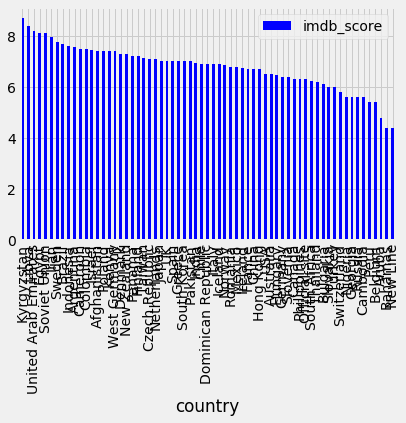

In [36]:
df[['country','imdb_score']].groupby('country').median().sort_values(ascending=False, by='imdb_score').plot(kind='bar', color='b')

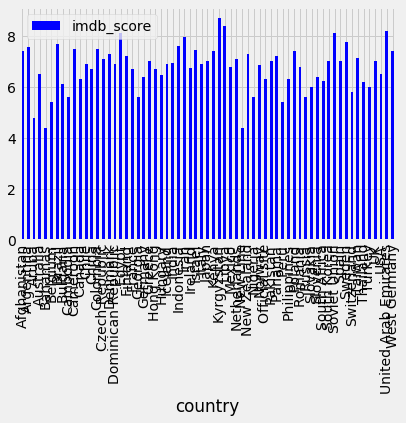

In [34]:
df[['country','imdb_score']].groupby('country').median().plot.bar(color='b')

- The plot becomes hard to interpret when the number of bars becomes large.

In [ ]:
plt.figure(figsize=(12,6))
df.groupby('country')['imdb_score'].median().sort_values(ascending=False).head(10).plot.bar(color='b')

- However, there is only one observation belongs to Kyrgyzstan. It would be unfair to claim that Kyrgyzstan makes the best movies.
- Let's remove the countries that have less than 10 movies.

In [37]:
df.loc[df.country=='Kyrgyzstan']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4468,Color,Sadyk Sher-Niyaz,16.0,135.0,135.0,0.0,Aziz Muradillayev,0.0,NaN,Action|Biography|Drama|History,Elina Abai Kyzy,Queen of the Mountains,3144,0,Mirlan Abdulayev,1.0,19th century|central asia|mother son relations...,http://www.imdb.com/title/tt2640460/?ref_=fn_t...,24.0,English,Kyrgyzstan,PG-13,1400000.0,2014.0,0.0,8.7,2.35,0


- The argument of filter must be a function that, applied to the group as a whole, returns True or False.

In [38]:
df.filter?

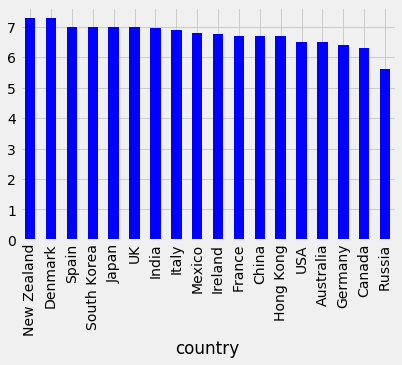

In [39]:
country_df = df.groupby('country').filter(lambda x: x.shape[0] > 10)
country_df.groupby('country')['imdb_score'].median().sort_values(ascending=False).plot.bar(color='b')

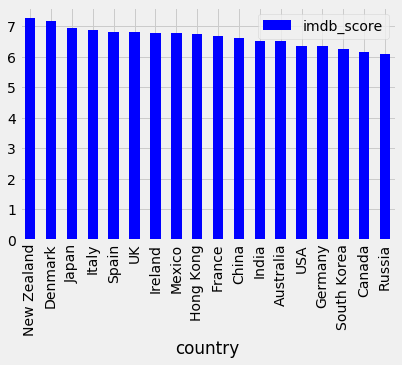

In [40]:
dg = df.groupby('country').agg({'duration':'count','imdb_score':'mean'})
dg[dg.duration>10].sort_values(ascending=False, by='imdb_score').plot(kind='bar',y='imdb_score', color='b')


- To see the trend of movie budget in the last 10 years, we can group the dataframe by year first and then calculate the mean of the budget column.

In [41]:
bar_df = df.groupby('title_year')[['budget']].mean().tail(10)
bar_df.head()

,budget
title_year,
2007.0,3.511748e+07
2008.0,4.180489e+07
2009.0,3.707329e+07
2010.0,4.547698e+07
2011.0,3.761537e+07


- The title year are float numbers when we read in the csv file. Let's change it to integer.

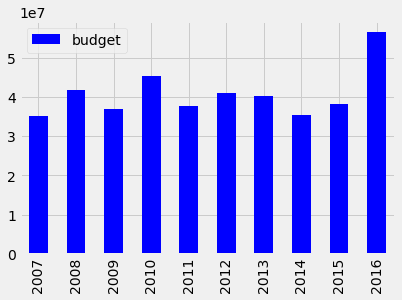

In [44]:
bar_df.index = bar_df.index.astype(np.int16)
bar_df.plot.bar(color='b')

### Genre
- Definitely we want to check out how the features changes across different genres. However, things get a little bit tricky here. We saw that genres are separated by the `|` symbol. At the same time, each movie might have more than one genre. So we may have to duplicate the row by multiple times.
- We will create a new dataframe that only contains the index and genre and merge it with the original dataframe based on the index.

In [45]:
# Make a copy of the original dataframe
df_genre = df.copy()
# Split the column the column using '|'
df_genre.genres = df_genre.genres.apply(lambda x: x.split('|'))

In [47]:
df.genres

0       Action|Adventure|Fantasy|Sci-Fi
1              Action|Adventure|Fantasy
2             Action|Adventure|Thriller
3                       Action|Thriller
4                           Documentary
                     ...               
5038                       Comedy|Drama
5039       Crime|Drama|Mystery|Thriller
5040              Drama|Horror|Thriller
5041               Comedy|Drama|Romance
5042                        Documentary
Name: genres, Length: 5043, dtype: object

- Now the genres column becomes a list instead of a string.

In [48]:
df_genre.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,"[Action, Adventure, Fantasy, Sci-Fi]",CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,"[Action, Adventure, Fantasy]",Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,"[Action, Adventure, Thriller]",Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,"[Action, Thriller]",Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,[Documentary],Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [49]:
# i keeps tracks of index
index=0
# save [index, genre] in a nested list
list_ = []
for item in df_genre.genres:
    list_.extend(map(lambda x: [index, x], item))
    index += 1
genre = pd.DataFrame(list_, columns=['index', 'genres'])
genre.head()
#df_genre.genres

,index,genres
0,0,Action
1,0,Adventure
2,0,Fantasy
3,0,Sci-Fi
4,1,Action


- Before we merge genre with the original dataframe, we want to remove the genres column first in order to avoid naming conflict.

In [50]:
df_genre = pd.merge(df_genre.drop('genres', axis=1), genre, how='right', left_index=True, right_on='index')
df_genre.head()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,index,genres
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,0,Action
1,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,0,Adventure
2,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,0,Fantasy
3,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,0,Sci-Fi
4,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1,Action


- All right, we get exactly what we want. Next we can group by the genre column and perform different analysis.
- Suppose we want to check out the imdb distribution among all the genres.

(14504, 29)


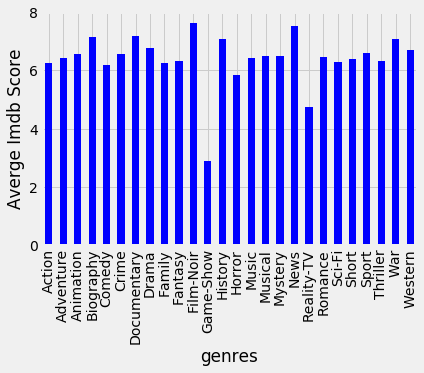

In [51]:
df_genre.groupby('genres')['imdb_score'].mean().plot.bar(color='b')
plt.ylabel('Averge Imdb Score')
print(df_genre.shape)

(14504, 2)


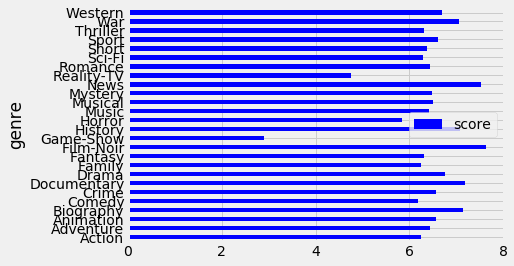

In [53]:
X = (zip(df.genres.str.split('|'), df['imdb_score']))
Y = (map(lambda t:list(zip(t[0],[t[1]]*len(t[0]))), X))
a, b = zip(*sum(Y,[]))  # flatten the list
Z = pd.DataFrame({'genre':a,'score':b})
print(Z.shape)
Z.groupby('genre').mean().plot(kind='barh', color='b')

### Exercise 4
- The previous barplot is sorted by the alphabetical order. What if we want to rank them by the mean `imdb_score` of each genre? 
- Which genre has the highest mean budget?
- When the number of bars becomes larger, it is a good idea to plot it horizitionally. See whether you can find the function from documentation or use the tab to see available functions.

In [ ]:
#### Your code here

plt.ylabel('Averge Imdb Score')

# Boxplot
- A boxplot is another way to visualize the distribution of a numeric feature. Let Q1, Q2 and Q3 represent the 25%, 50% and 75% quantile, respectively.
- A Boxplot is made of five quantiles: Q1−1.5(Q3−Q1), Q1, Q2, Q3, and Q3+1. 5(Q3−Q1). It can be made by function boxplot.

Text(0, 0.5, 'Imdb Score')

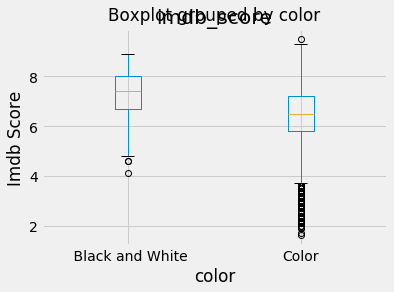

In [57]:
df_score = df[['color', 'imdb_score']]
df_score.boxplot(by='color', column='imdb_score')
plt.ylabel('Imdb Score')

**Exercise 5**

- What is distribution of budget for different kinds of poster?
- How to improve the plot to make it more interpretable?

In [ ]:
# Your code here
budget_df = df[['color', 'budget']].copy()

plt.ylabel('Budget')
plt.ylim(0,2e8)

# Seaborn

In [58]:
import seaborn as sns

- We can of course visualize the distribution of imdb score with histogram. However, seaborn provides a nice function that smooths out the histogram to estimate the distribution.

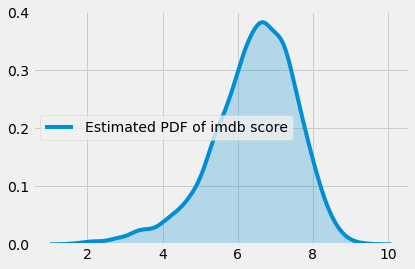

In [59]:
sns.kdeplot(df['imdb_score'], shade=True, label='Estimated PDF of imdb score')

- It is possible to combine histogram and the distribution estimate plot:

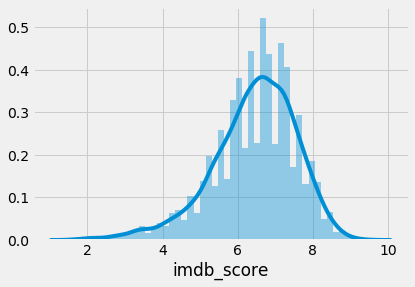

In [60]:
sns.distplot(df['imdb_score'])

- The joinplot() function combines histogram and scatter plot.
- Below we see "pearsonr=0.31" which indicates the pearson correlation of these two variables. However, we also see the p value is pretty small, which indicates that there is a significant linear relation between the two variables.

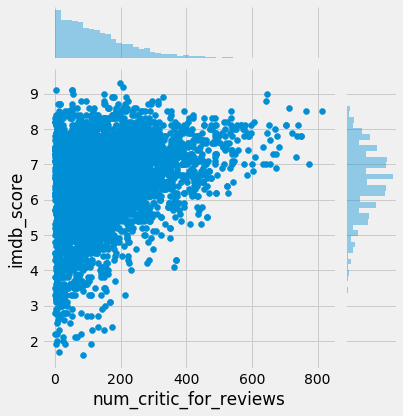

In [61]:
sns.jointplot(df['num_critic_for_reviews'], df['imdb_score'])

- We may also visualize the distribution of multiple features by using boxplot:

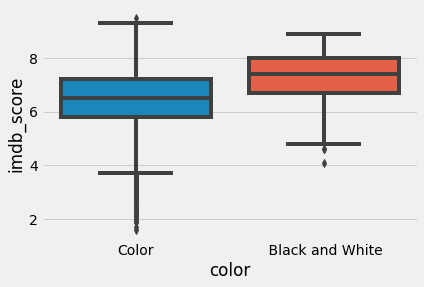

In [62]:
sns.boxplot(x='color', y='imdb_score', data=df)

### Advanced plots
- Seaborn also provides another famous sample dataset:

In [63]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


- This is a famous dataset record the information of people of different sex, being a smoker or not, visiting at different day or for different meal, the size of parties they joined, and the tip and the total bill they pay.
- To visualize the relation between total_bill and tip, of course we can use scatter plot. However, seaborn allows fitting with linear model as well.

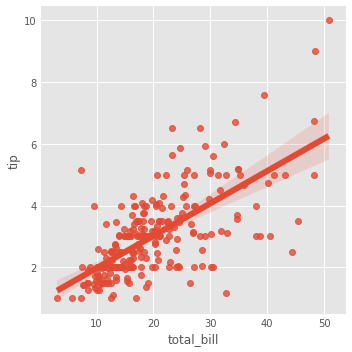

In [68]:
sns.lmplot("total_bill", "tip", tips)

- We can further split the data into "Male" and "Female" parts and visualize them.

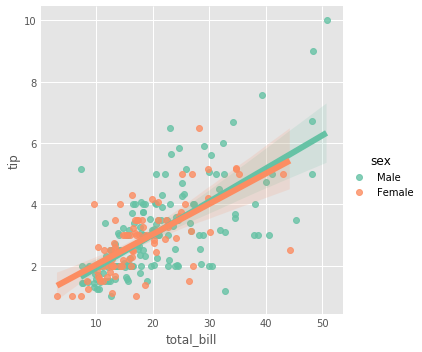

In [69]:
sns.lmplot("total_bill", "tip", tips, hue="sex", palette="Set2")

- You can also pass a dictionary to the palette argument by specifying the color of each level in the hue variable

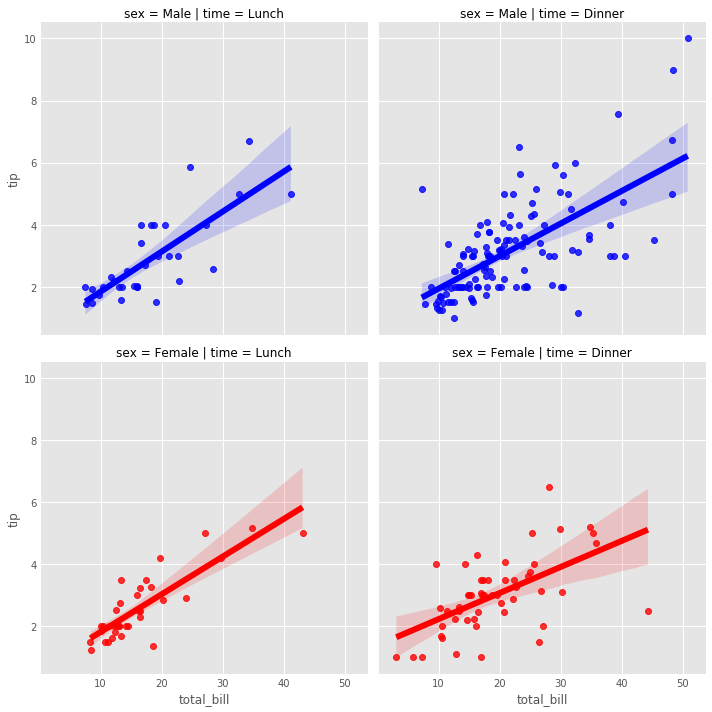

In [70]:
sns.lmplot("total_bill", "tip", tips, hue="sex", palette={"Male": "b", "Female": "r"}, col='time', row='sex')

- Here we used:
 - hue indicates according to which column we group our data.
 - palette simply specifies the color we want to use.

- We often need to compare the same kind of plot for different features. Functions for faceting comes in handy.
- Within the function FacetGrid(), hue indicates sketching a separate plot for each sex; col specifies that each plot is placed in a new column; palette specifies the colors. 
- Then we use .map() method to specify the type of the plot and the feature we want to visualize.

/home/drace/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


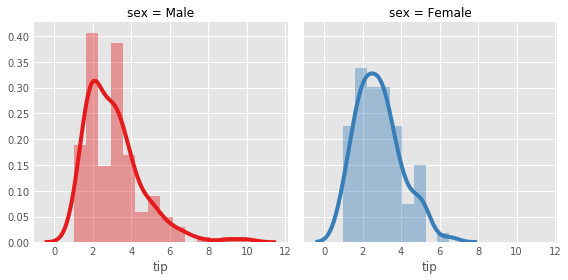

In [71]:
SexGrid = sns.FacetGrid(tips, col='sex', hue="sex", palette="Set1", size=4)
SexGrid.map(sns.distplot, "tip")

- Facet can be used to differentiate multiple factors as well.

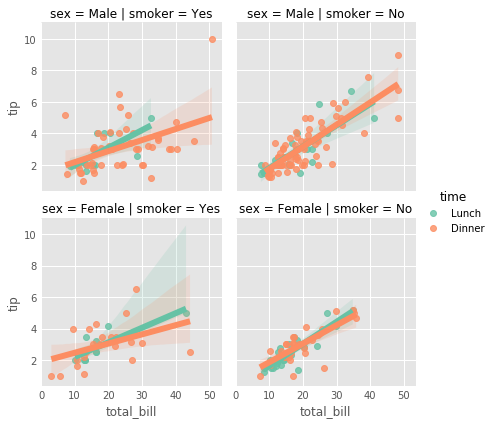

In [72]:
tipsGrid = sns.FacetGrid(tips, row='sex', col='smoker', hue='time', palette="Set2")
tipsGrid.map(sns.regplot,'total_bill','tip')
tipsGrid.add_legend()

### Exercise 6
Use FacetGrid to compare the distribution of imdb score for different poster color.

In [ ]:
#### Your code here


# Plotly

- By default, plotly will host the image on their own server and it can only be viewed limited number of times.
- To run the image locally in our notebook, we need to run the following line of code.
- There is a cheatsheet [here](https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf) to help you get started with Plotly.

In [73]:
import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)

- `iplot` function will display the graph in the notebook, `plot` will create a separate html file in the notebook folder. It takes a `Figure` object as the input.
- To create a `Figure` object, we need to tell plotly what the data is and the layout of the figure.
- To customize the number of bins in the histogram, you need to tell plotly the starting point and the ending point, along with the size of each bin.
- In the layout, we can customize the title of the graph and the gap between two bins.
- Checkout more examples in the documentation [here](https://plot.ly/python/histograms/).

In [75]:
from plotly.graph_objs import Figure, Histogram, Layout

min_ = df['imdb_score'].min()
max_ = df['imdb_score'].max()

data = [Histogram(x=df['imdb_score'], 
                  xbins=dict(start=min_,
                             end=max_,
                             size=(max_-min_)/10))]
layout = Layout(title="Histogram of IMDB score",
                bargap=0.2)
fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig, show_link=True, image_width=600, image_height=400)

- If we want to compare the histogram of two groups, we can add one more element to our data list.
- For example, the imdb score of two different genres.

In [76]:
drama_imdb = df_genre.loc[df_genre.genres=='Drama']['imdb_score']
comedy_imdb = df_genre.loc[df_genre.genres=='Comedy']['imdb_score']
# or
#groups = df[['genres','imdb_score']].groupby('genres')
#drama_imdb = groups.get_group('Drama').imdb_score
#comedy_imdb = groups.get_group('Comedy').imdb_score


getbins = lambda t:{'start':t.min(),'end':t.max(), 'size':0.5}

trace0 = Histogram(x=drama_imdb,
                   name='Drama',
                   xbins=getbins(drama_imdb))

trace1 = Histogram(x=comedy_imdb,
                   name='Comedy',
                   xbins=getbins(drama_imdb))

data = [trace0, trace1]

layout = Layout(title="Histogram of Dram and Comedy IMDB score",
               bargroupgap=0.1)
fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig, show_link=False, image_width=600, image_height=400)

- Scatterplot is similar to histogram, with the `Histogram` object changed to `Scatter`.
- You can customize the hover text, different styles of the markers, etc when you create the `Scatter` object. 
- Checkout more examples in the documentation [here](https://plot.ly/python/line-and-scatter/).

In [ ]:
from plotly.graph_objs import Scatter


data = [Scatter(x=df['budget'], y=df['gross'], mode = 'markers')]#, text=df['movie_title'])]
layout = Layout(title="Gross Income vs Budget")

fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig, show_link=False)

- Barplot follows the same pattern, you need to create a `Bar` object instead.
- Checkout more examples in the documentation [here](https://plot.ly/python/bar-charts/)

In [ ]:
from plotly.graph_objs import Bar

country_df = country_df.groupby('country')['imdb_score'].median().sort_values(ascending=False).reset_index()

data = [Bar(x=country_df['country'], y=country_df['imdb_score'], text=country_df['country'])]
layout = Layout(title="Countries with Highest Median Imdb Score")

fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig,show_link=False)

- This is a brief introduction to the plotly package and their python API changes rapidly.
- Always check out the latest version and find more examples on the [documentation page](https://plot.ly/python/).

# Solutions

**Exercise 1**

In [ ]:
langs = ["English" ,"French", "Mandarin"]
df.loc[(df["language"].isin(langs)) & (df["imdb_score"]>7)]

**Exercsie 2**

In [ ]:
plt.hist(np.log(df['budget'].dropna()), color="#666699")
plt.xlabel('log of budget')
plt.ylabel('count')
plt.title('Histogram of budget', fontsize=20)

**Exercise 3**

In [ ]:
gross_df = df[['director_facebook_likes', 'gross']]
gross_df.plot.scatter('director_facebook_likes', 'gross')

In [ ]:
critic_df = df[['num_critic_for_reviews', 'imdb_score']]
critic_df.plot.scatter('num_critic_for_reviews', 'imdb_score')

**Exercise 4**

In [ ]:
df_genre.groupby('genres')['imdb_score'].mean().sort_values(ascending=False).plot.bar()
plt.ylabel('Averge Imdb Score')

In [ ]:
df_genre.groupby('genres')['budget'].mean().sort_values().plot.barh()

**Exercsie 5**

In [ ]:
budget_df = df[['color', 'budget']]
budget_df = budget_df.loc[(budget_df.budget - budget_df.budget.mean()).abs() / budget_df.budget.std() < 2]
budget_df.boxplot(by='color', column='budget')
plt.ylabel('Budget')
plt.ylim(0,2e8)

**Exercise 6**

In [ ]:
g = sns.FacetGrid(data=df, col='color', hue='color', palette='Set1', size=6)
g.map(sns.distplot, 'imdb_score')

In [3]:
# this data has duplications because of language seperated and added as rows
df = pd.read_csv('zocdocnyc_cleaned.csv', index_col = 0) 
df0 = df.loc[df['Level'] == 0] # only picked the first row for every level

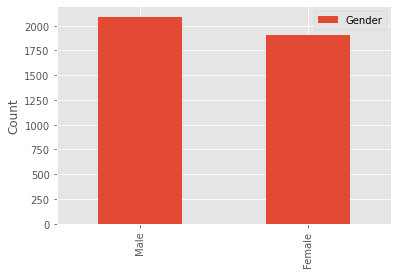

In [4]:
fig1 = pd.DataFrame(df0.Gender.value_counts())
fig1.plot.bar().set_ylabel('Count')
plt.show()